In [1]:
import os
import sys; sys.path.insert(0, '..')
import seaborn as sns
import numpy as np
#sys.path.insert(1, os.path.join(sys.path[0], '..'))
import df_utils
from df_utils import df_wrapper, get_timestamp_and_pose
import pandas as pd

### Innhenting av sensordata og annoteringsdata, samt definering av globale variabler 

In [2]:
train_csv_f_name = "../../data/train_data/train_martin_3_forsok3.csv"
train_annot_f_name = "../../data/annotation/martin_sensortest.txt"

train_csv_simon_f_name = "../../../data_simon_3_sensorer.csv"
train_annot_simon_f_name = "../../data/annotation/simon_train_3_sensor_080221.txt"

train_csv_jonas_f_name = "../../../data_trening_jonas_3_sensorer.csv"
train_annot_jonas_f_name = "../../data/annotation/jonas_train_3_sensors_080221.txt"

POSE_MAP = {
    "rett": 0,
    "fram": 1,
    "fram-hoyre": 2,
    "hoyre": 3,
    "bak-hoyre": 4,
    "bak": 5,
    "bak-venstre": 6,
    "venstre": 7,
    "fram-venstre": 8
}

In [3]:
knn_train_martin = df_wrapper(train_csv_f_name)
knn_train_martin.concat_sensor_data(3)

knn_train_simon = df_wrapper(train_csv_simon_f_name)
knn_train_simon.concat_sensor_data(3)

knn_train_jonas = df_wrapper(train_csv_jonas_f_name)
knn_train_jonas.concat_sensor_data(3)


Splitting into  3  separate dataframes...
Fixing time offsets
Dropping unused columns...
Min length of sensor data:  54078
../df_utils.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_arr[i][" TimeStamp (s)"] = self.df_arr[i][" TimeStamp (s)"] - df_time_offset
Splitting into  3  separate dataframes...
Fixing time offsets
Dropping unused columns...
Min length of sensor data:  52320
../df_utils.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_arr[i][" TimeStamp (s)"] = self.df_arr[i]["

54117

[[0.0, 123.32, 0], [125.24, 243.28, 1], [245.68, 362.24, 2], [366.72, 484.88, 3], [488.24, 602.08, 4], [605.2, 724.68, 5], [727.72, 842.28, 6], [846.84, 964.12, 7], [966.08, 1081.76, 8]]
Length of knn_train.df before drops: 54078
drops: 1254
length of knn_train.df after drops: 52824
52824
52824


<AxesSubplot:xlabel=' TimeStamp (s)', ylabel='Pose'>

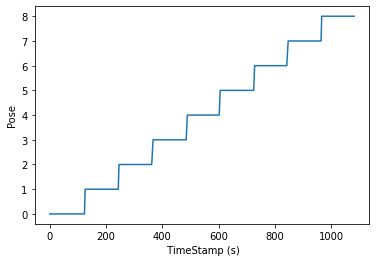

In [4]:
stamped_poses = get_timestamp_and_pose(train_annot_f_name, POSE_MAP)
print(stamped_poses)
print("Length of knn_train.df before drops: {}".format(len(knn_train_martin.df.index)))
knn_train_martin.align_poses(stamped_poses)

print(len(knn_train_martin.df.index))
# print(len(df_stamped_poses))
y_train_martin = knn_train_martin.df["Pose"]
# df['Pose'].hist(bins=4)
sns.lineplot(data=knn_train_martin.df, x=" TimeStamp (s)", y='Pose')
#sns.histplot(data=knn_train_martin.df['SensorId'])

[[0.0, 129.84, 0], [130.88, 249.28, 1], [252.16, 370.48, 2], [372.96, 489.2, 3], [490.84, 610.68, 4], [612.84, 729.8, 5], [732.44, 849.36, 6], [851.12, 969.48, 7], [971.64, 1090.36, 8]]
Length of knn_train.df before drops: 52320
drops: 830
length of knn_train.df after drops: 51490
51490
51490


<AxesSubplot:xlabel=' TimeStamp (s)', ylabel='Pose'>

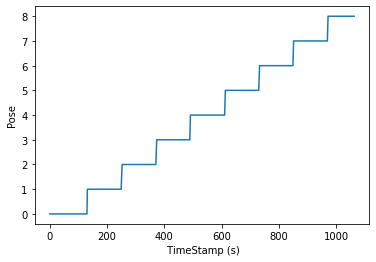

In [5]:
stamped_poses_simon = get_timestamp_and_pose(train_annot_simon_f_name, POSE_MAP)
print(stamped_poses_simon)
print("Length of knn_train.df before drops: {}".format(len(knn_train_simon.df.index)))
knn_train_simon.align_poses(stamped_poses_simon)

print(len(knn_train_simon.df.index))
# print(len(df_stamped_poses))
y_train_simon = knn_train_simon.df["Pose"]
# df['Pose'].hist(bins=4)
sns.lineplot(data=knn_train_simon.df, x=" TimeStamp (s)", y='Pose')
#sns.histplot(data=knn_train_martin.df['SensorId'])

[[0.0, 118.24, 0], [121.96, 238.2, 1], [243.16, 365.04, 2], [371.96, 487.6, 3], [489.04, 609.44, 4], [615.56, 738.24, 5], [748.76, 863.0, 6], [866.36, 987.76, 7], [992.84, 1117.76, 8]]
Length of knn_train.df before drops: 54117
drops: 2098
length of knn_train.df after drops: 52019
52019
52019


<AxesSubplot:xlabel=' TimeStamp (s)', ylabel='Pose'>

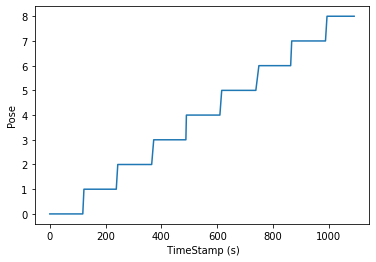

In [6]:
stamped_poses_jonas = get_timestamp_and_pose(train_annot_jonas_f_name, POSE_MAP)
print(stamped_poses_jonas)
print("Length of knn_train.df before drops: {}".format(len(knn_train_jonas.df.index)))
knn_train_jonas.align_poses(stamped_poses_jonas)

print(len(knn_train_jonas.df.index))
# print(len(df_stamped_poses))
y_train_jonas = knn_train_jonas.df["Pose"]
# df['Pose'].hist(bins=4)
sns.lineplot(data=knn_train_jonas.df, x=" TimeStamp (s)", y='Pose')
#sns.histplot(data=knn_train_martin.df['SensorId'])

In [7]:
df_train_martin = knn_train_martin.df
df_train_simon = knn_train_simon.df
df_train_jonas = knn_train_jonas.df

y_train = y_train_martin.append(y_train_simon)
y_train = y_train.append(y_train_jonas)

df_train = pd.concat([df_train_martin,df_train_simon,df_train_jonas])
df_train

,TimeStamp (s),AccX (g),AccY (g),AccZ (g),GyroX (deg/s),GyroY (deg/s),GyroZ (deg/s),MagX (uT),MagY (uT),MagZ (uT),...,MagY (uT),MagZ (uT),EulerX (deg),EulerY (deg),EulerZ (deg),QuatW,QuatX,QuatY,QuatZ,Pose
0,0.0000,0.019920,-0.794387,-0.601370,-1.562904,-1.464186,-0.498630,-10.045666,-28.373941,-27.243652,...,-20.748009,-36.988220,41.428467,9.834142,-69.666298,0.747616,-0.335055,0.135482,0.557184,0
1,0.0200,0.015635,-0.798804,-0.605099,-1.746947,-0.781661,-0.552266,-10.487769,-28.711199,-27.876856,...,-20.920061,-37.734138,41.424286,9.828160,-69.678291,0.747584,-0.334987,0.135538,0.557254,0
2,0.0400,0.015153,-0.801027,-0.604974,-0.723603,0.261424,-0.555029,-10.635139,-28.458256,-26.610451,...,-20.461252,-36.868870,41.403576,9.871590,-69.696747,0.747453,-0.335022,0.135195,0.557491,0
3,0.0600,0.020163,-0.797502,-0.608591,-0.445173,0.111246,-0.923887,-10.605668,-28.289625,-27.394417,...,-20.432577,-36.809200,41.417000,9.883158,-69.709579,0.747324,-0.335146,0.135219,0.557584,0
4,0.0800,0.026463,-0.787940,-0.609870,-0.919388,-0.897010,-0.986847,-10.664613,-29.441923,-27.243652,...,-20.260525,-37.077728,41.419933,9.901683,-69.730927,0.747169,-0.335222,0.135169,0.557759,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54112,1090.4000,-0.532361,-0.387199,-0.737558,0.239682,0.415916,-0.128227,-25.431023,0.995585,-39.214184,...,-2.366987,-38.420380,30.692022,-24.531794,-36.857323,0.911781,-0.180579,0.276119,0.244552,8
54113,1090.4200,-0.531845,-0.388514,-0.733785,0.302097,0.008098,-0.169589,-25.224703,0.433488,-39.304649,...,-2.223610,-38.330872,30.757931,-24.483858,-36.897896,0.911637,-0.181152,0.275957,0.244846,8
54114,1090.4399,-0.530322,-0.389299,-0.733020,-0.327502,0.391093,0.706819,-25.047863,-0.887435,-39.666473,...,-2.825796,-38.271194,30.819136,-24.450815,-36.930458,0.911502,-0.181662,0.275887,0.245047,8
54115,1090.4600,-0.527906,-0.386170,-0.732815,0.054942,-0.229800,0.140417,-25.136284,0.967479,-39.666473,...,-2.625067,-38.838089,30.871389,-24.417864,-36.962009,0.911384,-0.182103,0.275797,0.245262,8


In [8]:
test_csv_f_name = "../../data/test_data/test_martin_3.csv"
test_annot_f_name = "../../data/annotation/martin_sensortest_nilsen.txt"

knn_test = df_wrapper(test_csv_f_name)
knn_test.concat_sensor_data(3)
knn_test.df

Splitting into  3  separate dataframes...
Fixing time offsets
Dropping unused columns...
Min length of sensor data:  4602
../df_utils.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_arr[i][" TimeStamp (s)"] = self.df_arr[i][" TimeStamp (s)"] - df_time_offset


,TimeStamp (s),AccX (g),AccY (g),AccZ (g),GyroX (deg/s),GyroY (deg/s),GyroZ (deg/s),MagX (uT),MagY (uT),MagZ (uT),...,MagX (uT),MagY (uT),MagZ (uT),EulerX (deg),EulerY (deg),EulerZ (deg),QuatW,QuatX,QuatY,QuatZ
0,0.00,0.015310,-0.788833,-0.614601,-0.289234,0.148599,-0.033029,-9.839348,-28.458256,-28.027618,...,-1.071338,-17.708399,-38.867931,37.483280,10.758442,-132.375031,-0.353097,0.210372,-0.256812,-0.874708
1,0.02,0.016988,-0.793990,-0.618397,-1.066031,2.228461,0.906500,-9.603559,-26.743862,-28.329145,...,-0.721022,-18.281912,-38.748581,37.483467,10.769194,-132.347015,-0.353279,0.210515,-0.256723,-0.874626
2,0.04,0.016548,-0.778584,-0.619201,0.402291,2.340249,1.330297,-9.397241,-27.924265,-27.364267,...,-1.100532,-18.167210,-39.136456,37.473198,10.791303,-132.299423,-0.353598,0.210754,-0.256479,-0.874511
3,0.06,0.016636,-0.779548,-0.616585,-1.681398,2.340109,0.459941,-9.721454,-27.109226,-28.057776,...,-0.983759,-17.966480,-39.136456,37.457188,10.839692,-132.248672,-0.353876,0.211177,-0.256090,-0.874411
4,0.08,0.018946,-0.789322,-0.622949,-1.797317,1.478723,0.090666,-9.691978,-28.036684,-27.937162,...,-1.042145,-17.966480,-38.957439,37.465382,10.898922,-132.218246,-0.353923,0.211709,-0.255885,-0.874323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4597,91.94,0.120100,-0.493723,-0.858217,10.623210,19.655279,-8.492423,-6.715131,-18.846420,-36.168831,...,5.964177,-9.851303,-42.478168,25.890158,21.628696,-126.950310,-0.389899,0.261877,-0.115215,-0.875285
4598,91.96,0.126508,-0.493604,-0.839787,11.495259,19.904470,-9.395234,-6.449863,-18.509165,-35.987907,...,6.694001,-11.055676,-43.104736,26.183422,21.653545,-126.894440,-0.389593,0.263113,-0.117226,-0.874784
4599,91.98,0.141890,-0.512598,-0.846178,9.437231,16.525085,-8.950869,-6.066706,-18.565372,-36.379890,...,6.372879,-11.715213,-43.134571,26.445723,21.708185,-126.830879,-0.389340,0.264469,-0.118859,-0.874267
4600,92.00,0.148199,-0.524692,-0.842576,10.974522,20.330591,-6.262592,-5.830916,-18.256224,-36.319592,...,6.372879,-10.711570,-42.716862,26.744068,21.763510,-126.739693,-0.389208,0.265981,-0.120698,-0.873615


[[0.0, 10.2, 0], [11.32, 19.96, 1], [20.64, 29.88, 2], [31.12, 40.64, 3], [41.96, 49.96, 4], [51.12, 60.0, 5], [61.32, 70.36, 6], [72.08, 80.28, 7], [81.32, 90.2, 8]]
drops: 563
length of knn_train.df after drops: 4039
4039


<AxesSubplot:xlabel=' TimeStamp (s)', ylabel='Pose'>

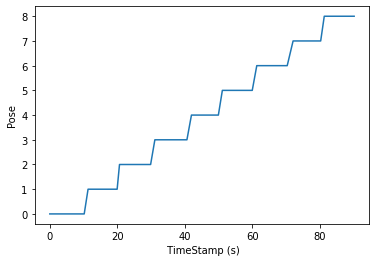

In [9]:
s_poses = get_timestamp_and_pose(test_annot_f_name, POSE_MAP)

print(s_poses)
knn_test.align_poses(s_poses)

y_test = knn_test.df["Pose"]  # df_test["Pose"]

sns.lineplot(data=knn_test.df, x=" TimeStamp (s)", y='Pose')

In [10]:
x_train = df_train.drop([' TimeStamp (s)', 'Pose'],axis=1)
x_test = knn_test.df.drop([' TimeStamp (s)', 'Pose'], axis=1) 


print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(156333, 48)
(156333,)
(4039, 48)


In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#n_estimators_lst = [i for i in range(1, 200)]
#parameters = {'n_estimators':n_estimators_lst} 
#rfc = RandomForestClassifier(random_state=69)
#clf = GridSearchCV(rfc, parameters, n_jobs=-1)
#clf.fit(x_train, y_train)

pipe = make_pipeline(RandomForestClassifier(n_estimators=200, random_state=69))
pipe.fit(x_train,y_train)
predictions = pipe.predict(x_test)

#pipe = make_pipeline(KNeighborsClassifier(n_neighbors=10))
#pipe.fit(x_train, y_train)
#predictions = pipe.predict(x_test)

#rfc.fit(x_train,y_train)
#predictions = clf.predict(x_test)

#mlp = MLPClassifier(activation='relu', random_state=69)
#mlp.fit(x_train,y_train)
#predictions = mlp.predict(x_test)


<AxesSubplot:xlabel='x', ylabel='y'>

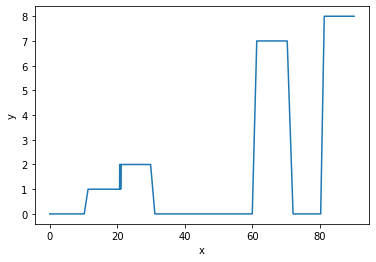

In [12]:
df_predict = pd.DataFrame({'x': knn_test.df[' TimeStamp (s)'],'y':predictions})
sns.lineplot(data=df_predict,x='x',y='y')

[[511   0   0   0   0   0   0   0   0]
 [  0 433   0   0   0   0   0   0   0]
 [  0  13 450   0   0   0   0   0   0]
 [477   0   0   0   0   0   0   0   0]
 [401   0   0   0   0   0   0   0   0]
 [445   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 453   0]
 [411   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 445]]
              precision    recall  f1-score   support

           0       0.23      1.00      0.37       511
           1       0.97      1.00      0.99       433
           2       1.00      0.97      0.99       463
           3       1.00      0.00      0.00       477
           4       1.00      0.00      0.00       401
           5       1.00      0.00      0.00       445
           6       1.00      0.00      0.00       453
           7       0.00      0.00      0.00       411
           8       1.00      1.00      1.00       445

    accuracy                           0.46      4039
   macro avg       0.80      0.44      0.37      403

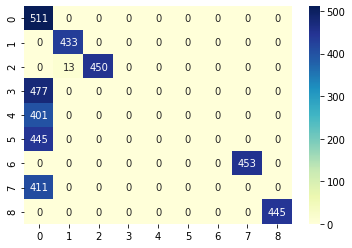

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions, zero_division=True))

sns.heatmap(confusion_matrix(y_test, predictions),
            cmap="YlGnBu", annot=True, fmt="d")

number_of_corrects = 0
for num in range(len(predictions)):
    if(predictions[num] == y_test.iloc[num]):
        number_of_corrects += 1

print("number of correct: {}".format(number_of_corrects))
print("number of guesses: {}".format(len(predictions)))
print("% correct: {}".format(number_of_corrects / len(predictions) * 100))

In [14]:
number_of_corrects = 0
for num in range(len(predictions)):
    if(predictions[num] == y_test.iloc[num]):
        number_of_corrects += 1


print("number of correct: {}".format(number_of_corrects))
print("number of guesses: {}".format(len(predictions)))
print("% correct: {}".format(number_of_corrects/len(predictions)*100))

number of correct: 1839
number of guesses: 4039
% correct: 45.53107204753652


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=59d486bc-e14d-4632-9064-12272fc72d11' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>